<a href="https://colab.research.google.com/github/PRyuC/Pascal_INFO5502_Summer2022/blob/main/lab_assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fifth Lab-assignment (07/29/2022 11:59'AM' - 08/02/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand Data Visualization, we will practice how to create visualizations for different datasets bu using different tools.

Question 1 (50 points). In this questions, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. 

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. This dataset contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV (comma-separated values) file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year, for a total of 76 data points.

You can download the dataset here: 

Dataset: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab_assignment_05_census.csv

Source: https://www.ipums.org/

(1)(10 points) Start by choosing a question you'd like a visualization to answer.

(2)(30 points) Generate a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

(3)(10 points) Provide a short write-up (no more than 3 paragraphs) describing your design.


While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

In [1]:
from google.colab import files
upload = files.upload()

Saving lab_assignment_05_census.csv to lab_assignment_05_census.csv


In [101]:
import pandas as pd

df = pd.read_csv("/content/lab_assignment_05_census.csv")

In [ ]:
#(1)
# Your answer here (question + explanation):


'''

Question: What was the proportion of older people (70+) in 1900 vs 2000?

Explanation: Based on the idea that life expectancy has grown over time, I would like to know the  
proportional difference in the population of older people in 2000 compared to 1900. I assume that 
people lived longer in 2000 than in 1900 meaning the older age groups should be proportionally more 
present in 2000. Therefore, I will graph the proportion of the older age groups which will show 
exactly what the difference is in terms of percentage.


'''



In [102]:
#(2)
# Your answer here (python code + explanation):


import matplotlib.pyplot as plt # importing the necessary libraries
import numpy as np 

df_1900_male = df[(df['Year'] == 1900) & (df['Sex'] == 1)] # separating the genders for 1900
df_1900_female = df[(df['Year'] == 1900) & (df['Sex'] ==2)]

df_2000_male = df[(df['Year'] == 2000) & (df['Sex'] == 1)] # separating the genders for 2000
df_2000_female = df[(df['Year'] == 2000) & (df['Sex'] == 2)]


df_1900_total = pd.concat([df_1900_male, df_1900_female]).groupby('Age', as_index=False)["People"].sum() # adding population for both genders
df_2000_total = pd.concat([df_2000_male, df_2000_female]).groupby('Age', as_index=False)["People"].sum()


df_1900_total['per'] = df_1900_total.People * 100 / df_1900_total.People.sum() # getting percentage out of total population for each age group
df_2000_total['per'] = df_2000_total.People * 100 / df_2000_total.People.sum()


df_2000_old = df_2000_total[(df_2000_total['Age'] >= 70)] # keeping older age groups only
df_1900_old = df_1900_total[(df_1900_total['Age'] >= 70)]



ages = []                        # creating a list to append age groups
for i in df_2000_old['Age']:     # appending ages to the list
  ages.append(i)

per_1900 = []                    # creating lists to append percentage
per_2000 = []                    
for i in df_1900_old['per']:     # appending percentages to the lists
  per_1900.append(round(i, 3))   # keeping up to 3 decimals

for i in df_2000_old['per']:
  per_2000.append(round(i, 3))

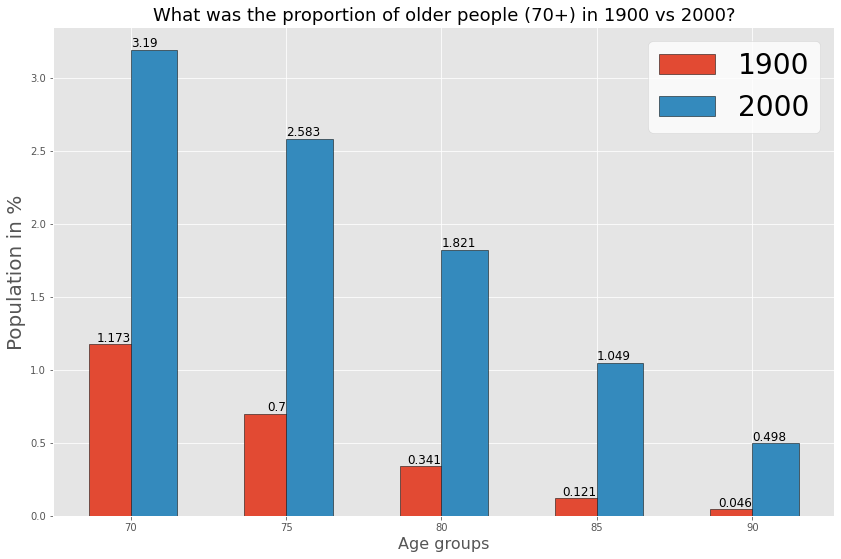

In [108]:
# creating the visualization

plt.style.use('ggplot') # using a specific premade style
fig, ax = plt.subplots(figsize=(14, 9)) # setting the size of the plot
x_indexes = np.arange(len(ages)) # making the ages into an array of 4 values to separate the bars
width = 0.3 # setting a width for the bars

x = x_indexes               # assigning x to array, y to percentages
y1 = df_1900_old.per
y2 = df_2000_old.per

plt.bar(x-0.12, y1, ec='black', width=width, label='1900') # setting x, y, changing width to move bars, setting labels and bar outlines
plt.bar(x+0.15, y2, ec='black', width=width, label='2000')


# adding percentage on top of bars 
for index, data in enumerate(per_1900):                                       
  plt.text(x=index, y=data, s=f'{data}', ha='right', va='bottom', fontsize=12) 
for index, data in enumerate(per_2000):
  plt.text(x=index, y=data, s=f'{data}', ha='left', va='bottom', fontsize=12)


plt.xticks(ticks=x_indexes,labels=ages) # changing ages back to actual age values


plt.title('What was the proportion of older people (70+) in 1900 vs 2000?', fontsize=18) # setting a title with fontsize
plt.xlabel('Age groups', fontsize=16) # setting a label and fontsize for x and y
plt.ylabel('Population in %', fontsize=20) 
plt.legend(frameon=True, fontsize=28, facecolor='white') # including legend and some parameters to make it easier to see
plt.show() # showing plot


In [ ]:
#(3)
# Your answer here (interpretation of the results):


'''

This graph appropriately answers the question proposed in question #1 as each bar represents a percentage 
that is based on the total population for each age group. For instance, the age group of 70 formed about 
only 1% of the population in 1900 but about 3% in 2000 confirming that people lived longer in 2000 than in 
1900 since there were proportionally more older people. That is to say, older people formed a bigger portion 
of the population in 2000 which seems to confirm a better life expectancy. We can also see that very few people 
(less than 0.05%) lived to be 90+ in 1900 also showing that people lived longer in 2000.

In terms of visualization, for the type of visualiation, I used bars as these allow easy visualization for this type 
of data with percentage. For the size, I set a width of 0.3 for the bars and moved them so they would be next to each 
other and not stacked to easily compare them. For the color, I kept the red and blue colors of the 'ggplot' style chosen 
as they are very discernable colors and easy on the eyes. For the scale, I kept it as a percentage on the y axis with a 
grid in the background to be able to match the end of the bar to the y axis more easily. For the size, I chose bigger fontsizes 
for ease of reading and made the legend bigger as well. Other things done include making the outline of the bars black; modifying 
the legend to a white background and adding a frame; including the percentage (up to 3 decimals) at the top of the bars making 
accessible the specific percentage for each category.

However, there are other interesting data that cannot been inferred from this such as the difference between genders. 
I have decided to add the population values for both genders together but it would have been interesting to see this data as well
since it is well known that women live on average longer than men. Looking at the younger age groups could also have been interesting, 
however it was not the object of this question. Moreover, this only tells a broad story about the proportion of the age groups in the
population but there is not a lot that can be necessarily infered in terms of life expectancy other than what can be observed here.


'''
